# Multiple Linear Regression

## [1] Importing libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
# downloading Dataset

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

## [2] reading Data

In [7]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# selecting desired features

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


## [3] Visualization of data

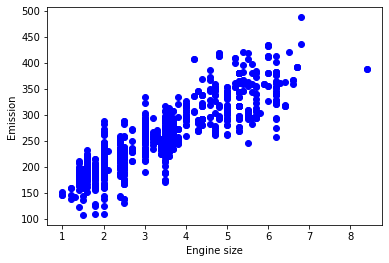

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## [4] train and test data creation, and visualization

In [10]:
# creating test and training data

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

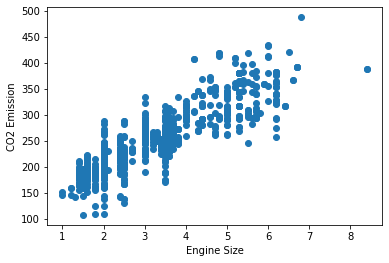

In [11]:
#plotting train data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

## [5] Multiple Regression Model creation from train data

In [13]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
x_axis = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_axis = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x_axis, y_axis)

# The coefficients
print ('Coefficients: ', regression.coef_)

Coefficients:  [[8.89976385 8.81650182 9.56419284]]


## [6] Pridiction

In [16]:
y_hat = regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression.score(x, y))

Residual sum of squares: 498.97
Variance score: 0.89


## [7] Using __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB

### 1. Regression Model creation

In [17]:
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', ]])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(x_train, y_train)
print('Coefficients: ', regression.coef_)

Coefficients:  [[9.44859384 7.5447763  8.4072803 ]]


### 2. Prediction

In [20]:
NEWy_hat = regression.predict(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', ]])

x_new = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', ]])
y_new = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((NEWy_hat - y) ** 2))
print('Variance score: %.2f' % regression.score(x_new, y_new))

Residual sum of squares: 515.25
Variance score: 0.88
